In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_column', 16)
pd.set_option('precision', 2)

train = pd.read_csv('c://users//me//desktop//train.csv')
test =pd.read_csv('c://users//me//desktop//test.csv')

print(train.describe()[:])
print("\n")


       PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33




In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [74]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'AgeGroup', 'CabinBool', 'Title', 'FareBand'], dtype='object')

In [5]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.86,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.07,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.13,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.07,NaN,C


In [6]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.75,NaN,Q
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.10,C92,C
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.00,B22,S
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.52,NaN,S
446,447,1,2,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.50,NaN,S


In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
train.describe(include ="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.00,891.00,891.00,891,891,714.00,891.00,891.00,891,891.00,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Gavey, Mr. Lawrence",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.00,0.38,2.31,NaN,NaN,29.70,0.52,0.38,NaN,32.20,NaN,NaN
std,257.35,0.49,0.84,NaN,NaN,14.53,1.10,0.81,NaN,49.69,NaN,NaN
min,1.00,0.00,1.00,NaN,NaN,0.42,0.00,0.00,NaN,0.00,NaN,NaN
25%,223.50,0.00,2.00,NaN,NaN,20.12,0.00,0.00,NaN,7.91,NaN,NaN
50%,446.00,0.00,3.00,NaN,NaN,28.00,0.00,0.00,NaN,14.45,NaN,NaN
75%,668.50,1.00,3.00,NaN,NaN,38.00,1.00,0.00,NaN,31.00,NaN,NaN


In [9]:
pd.isnull(train).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

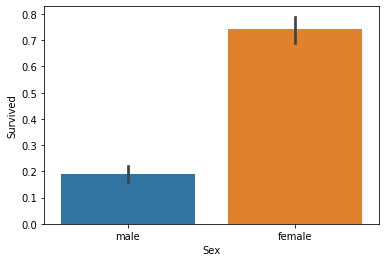

In [10]:
sbn.barplot(x ='Sex',y ='Survived',data =train)

In [11]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.46,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.86,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.07,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.13,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.07,NaN,C


In [12]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
train['Sex']=='female'

0      False
1       True
2       True
3       True
4      False
5      False
6      False
7      False
8       True
9       True
10      True
11      True
12     False
13     False
14      True
15      True
16     False
17     False
18      True
19      True
20     False
21     False
22      True
23     False
24      True
25      True
26     False
27     False
28      True
29     False
       ...  
861    False
862     True
863     True
864    False
865     True
866     True
867    False
868    False
869    False
870    False
871     True
872    False
873    False
874     True
875     True
876    False
877    False
878    False
879     True
880     True
881    False
882     True
883    False
884    False
885     True
886    False
887     True
888     True
889    False
890    False
Name: Sex, Length: 891, dtype: bool

In [14]:
train['Survived'][train['Sex']=='female']

1      1
2      1
3      1
8      1
9      1
10     1
11     1
14     0
15     1
18     0
19     1
22     1
24     0
25     1
28     1
31     1
32     1
38     0
39     1
40     0
41     0
43     1
44     1
47     1
49     0
52     1
53     1
56     1
58     1
61     1
      ..
807    0
809    1
813    0
816    0
820    1
823    1
829    1
830    1
835    1
842    1
849    1
852    0
853    1
854    0
855    1
856    1
858    1
862    1
863    0
865    1
866    1
871    1
874    1
875    1
879    1
880    1
882    0
885    0
887    1
888    0
Name: Survived, Length: 314, dtype: int64

In [15]:
train['Survived'][train['Sex']=='female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [16]:
train['Survived'][train['Sex']=='female'].value_counts(normalize=True)

1    0.74
0    0.26
Name: Survived, dtype: float64

In [17]:
(train['Survived'][train['Sex']=='female'].value_counts(normalize=True)[1]*100)

74.20382165605095

In [18]:
(train['Survived'][train['Sex']=='male'].value_counts(normalize=True)[1]*100)

18.890814558058924

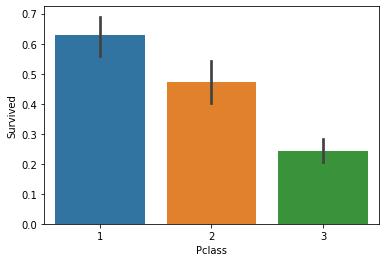

In [19]:
sbn.barplot(x ='Pclass',y ='Survived',data =train)

In [20]:
(train['Survived'][train['Pclass']==1].value_counts(normalize=True)[1]*100)

62.96296296296296

In [21]:
(train['Survived'][train['Pclass']==2].value_counts(normalize=True)[1]*100)

47.28260869565217

In [22]:
(train['Survived'][train['Pclass']==3].value_counts(normalize=True)[1]*100)

24.236252545824847

In [23]:
(train['Survived'][train['Pclass']==1].value_counts())

1    136
0     80
Name: Survived, dtype: int64

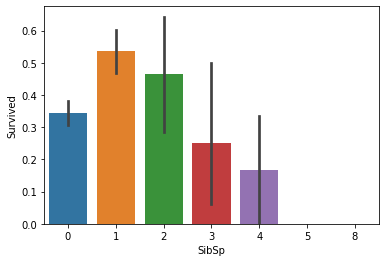

In [24]:
sbn.barplot(x ='SibSp',y ='Survived',data = train)

In [25]:
(train['Survived'][train['SibSp']==0].value_counts(normalize =True)[1]*100)

34.53947368421053

In [26]:
(train['Survived'][train['SibSp']==1].value_counts(normalize =True)[1]*100)

53.588516746411486

In [27]:
(train['Survived'][train['SibSp']==2].value_counts(normalize=True)[1]*100)

46.42857142857143

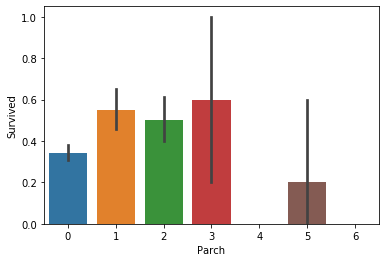

In [28]:
sbn.barplot(x ='Parch' ,y ='Survived' ,data  = train)

In [29]:
(train['Survived'][train['Parch']==0].value_counts(normalize =True)[1]*100)

34.365781710914455

In [30]:
(train['Survived'][train['Parch']==1].value_counts(normalize =True)[1]*100)

55.08474576271186

In [31]:
(train['Survived'][train['Parch']==2].value_counts(normalize =True)[1]*100)

50.0

In [32]:
(train['Survived'][train['Parch']==3].value_counts(normalize = True)[1]*100)

60.0

In [33]:
#Age features

train["Age"] =train['Age'].fillna(-0.5)
test["Age"] = test['Age'].fillna(-0.5)

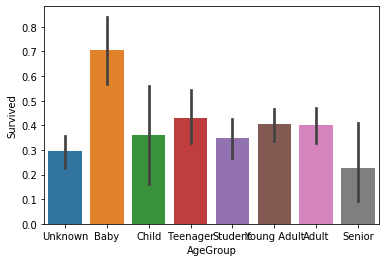

In [34]:
bins =   [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sbn.barplot(x="AgeGroup", y="Survived", data=train)


In [35]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,Young Adult
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.46,NaN,Q,Unknown
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.86,E46,S,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.07,NaN,S,Baby
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.13,NaN,S,Young Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.07,NaN,C,Teenager


In [36]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))


In [37]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.92,NaN,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S,Young Adult,0
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.46,NaN,Q,Unknown,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.86,E46,S,Adult,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.07,NaN,S,Baby,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.13,NaN,S,Young Adult,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.07,NaN,C,Teenager,0


In [38]:
(train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

66.66666666666666

In [39]:
(train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

29.985443959243085

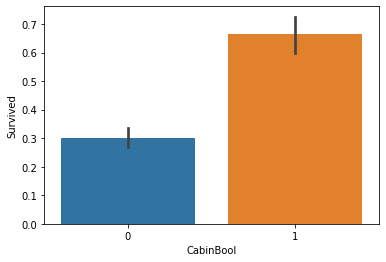

In [40]:
sbn.barplot(x ='CabinBool',y ='Survived',data =train)

In [41]:
#cleaning the data
test.describe(include ='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.00,418.00,418,418,418.00,418.00,418.00,418,417.00,91,418,418,418.00
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Klasen, Miss. Gertrud Emilia",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.50,2.27,NaN,NaN,23.94,0.45,0.39,NaN,35.63,NaN,NaN,NaN,0.22
std,120.81,0.84,NaN,NaN,17.74,0.90,0.98,NaN,55.91,NaN,NaN,NaN,0.41
min,892.00,1.00,NaN,NaN,-0.50,0.00,0.00,NaN,0.00,NaN,NaN,NaN,0.00
25%,996.25,1.00,NaN,NaN,9.00,0.00,0.00,NaN,7.90,NaN,NaN,NaN,0.00
50%,1100.50,3.00,NaN,NaN,24.00,0.00,0.00,NaN,14.45,NaN,NaN,NaN,0.00
75%,1204.75,3.00,NaN,NaN,35.75,1.00,0.00,NaN,31.50,NaN,NaN,NaN,0.00


In [42]:
#we will drop the cabin feature 

train = train.drop(['Cabin'],axis =1)
test = test.drop(['Cabin'],axis =1)

In [43]:
#we will also drop the ticket feature since it's unlikely to useful for any information

train =train.drop(['Ticket'],axis =1)
test  =test.drop(['Ticket'],axis =1)

In [44]:
#Embarked Feature
#now we need to fill in the missing values in the Embarked feature

print( "Number of people embarking in Southampton (S):" ,  )
southampton = train[train["Embarked"] == "S"].shape[0]
print( southampton  )


Number of people embarking in Southampton (S):
644


In [45]:
print( "Number of people embarking in Cherbourg (C):" ,  )
cherbourg = train[train["Embarked"] == "C"].shape[0]
print( cherbourg  )

Number of people embarking in Cherbourg (C):
168


In [46]:
print( "Number of people embarking in Queenstown (Q):" ,  )
queenstown = train[train["Embarked"] == "Q"].shape[0]
print( queenstown  )


Number of people embarking in Queenstown (Q):
77


In [47]:
#most of the people are embarked from soutnampton so we will fill the missing value with "S"
train = train.fillna({'Embarked':"S"})

In [48]:
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S,Student,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.28,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.92,S,Young Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,S,Young Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,S,Young Adult,0
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,8.46,Q,Unknown,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.86,S,Adult,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.07,S,Baby,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.13,S,Young Adult,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.07,C,Teenager,0


In [49]:
#now we will cleaning the age feature
#create combine group of both data sets

combine =[train,test]
combine[0]
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract(', ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'] )
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(
       ['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'],
        'Rare')

    dataset['Title'] = dataset['Title'].replace(['Countess', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S,Student,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.28,C,Adult,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.92,S,Young Adult,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,S,Young Adult,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,S,Young Adult,0,Mr
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,8.46,Q,Unknown,0,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.86,S,Adult,1,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.07,S,Baby,0,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.13,S,Young Adult,0,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.07,C,Teenager,0,Mrs


In [50]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).count()

,Title,Survived
0,Master,40
1,Miss,185
2,Mr,517
3,Mrs,126
4,Rare,21
5,Royal,1


In [51]:
#map each of the title group to a nymerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
print( "\n\nAfter replacing title with neumeric values.\n"  )
train  



After replacing title with neumeric values.



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S,Student,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.28,C,Adult,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.92,S,Young Adult,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,S,Young Adult,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,S,Young Adult,0,1.0
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,8.46,Q,Unknown,0,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.86,S,Adult,1,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.07,S,Baby,0,4.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.13,S,Young Adult,0,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.07,C,Teenager,0,3.0


In [52]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode()
mr_age

0    Young Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [53]:
miss_age = train[train["Title"] == 2]["AgeGroup"].mode()
miss_age


0    Unknown
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [54]:
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode()
mrs_age

0    Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [55]:
master_age = train[train["Title"] == 4]["AgeGroup"].mode()
master_age

0    Baby
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [56]:
royal_age = train[train["Title"] == 5]["AgeGroup"].mode()
royal_age

0    Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [57]:
rare_age = train[train["Title"] == 6]["AgeGroup"].mode()
rare_age

0    Adult
Name: AgeGroup, dtype: category
Categories (8, object): [Unknown < Baby < Child < Teenager < Student < Young Adult < Adult < Senior]

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S,Student,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.28,C,Adult,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.92,S,Young Adult,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,S,Young Adult,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,S,Young Adult,0,1.0


In [59]:
print( "\n\n********   train[AgeGroup][0] :  \n\n"  )
for x in range(10) :
      print(train["AgeGroup"][x] )




********   train[AgeGroup][0] :  


Student
Adult
Young Adult
Young Adult
Young Adult
Unknown
Adult
Baby
Young Adult
Teenager


In [60]:
age_title_mapping = {1: "Young Adult", 2: "Student",
                3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[  train["Title"][x]  ]
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]
print( "\n\nAfter replacing Unknown values from AgeGroup column : \n"  )
train  



After replacing Unknown values from AgeGroup column : 



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S,Student,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.28,C,Adult,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.92,S,Young Adult,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,S,Young Adult,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,S,Young Adult,0,1.0
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,8.46,Q,Young Adult,0,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.86,S,Adult,1,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.07,S,Baby,0,4.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.13,S,Young Adult,0,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.07,C,Teenager,0,3.0


In [61]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3,
               'Student': 4, 'Young Adult': 5,
               'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)
print()
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S,4,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.28,C,6,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.92,S,5,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,S,5,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,S,5,0,1.0
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,8.46,Q,5,0,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.86,S,6,1,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.07,S,1,0,4.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.13,S,5,0,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.07,C,3,0,3.0


In [62]:
#drop the age column and Name column
train = train.drop(['Age'], axis=1)
test = test.drop(['Age'], axis=1)
print( "\n\nAge column and name column droped."  )
train




Age column and name column droped.


,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.25,S,4,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.28,C,6,1,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.92,S,5,0,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.10,S,5,1,3.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.05,S,5,0,1.0
5,6,0,3,"Moran, Mr. James",male,0,0,8.46,Q,5,0,1.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,51.86,S,6,1,1.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,21.07,S,1,0,4.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,11.13,S,5,0,3.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,30.07,C,3,0,3.0


In [63]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)
train

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.25,S,4,0,1.0
1,2,1,1,1,1,0,71.28,C,6,1,3.0
2,3,1,3,1,0,0,7.92,S,5,0,2.0
3,4,1,1,1,1,0,53.10,S,5,1,3.0
4,5,0,3,0,0,0,8.05,S,5,0,1.0
5,6,0,3,0,0,0,8.46,Q,5,0,1.0
6,7,0,1,0,0,0,51.86,S,6,1,1.0
7,8,0,3,0,3,1,21.07,S,1,0,4.0
8,9,1,3,1,0,2,11.13,S,5,0,3.0
9,10,1,2,1,1,0,30.07,C,3,0,3.0


In [64]:
#embarked mapping
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.25,1,4,0,1.0
1,2,1,1,1,1,0,71.28,2,6,1,3.0
2,3,1,3,1,0,0,7.92,1,5,0,2.0
3,4,1,1,1,1,0,53.10,1,5,1,3.0
4,5,0,3,0,0,0,8.05,1,5,0,1.0


In [65]:
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x]
        test["Fare"][x] = round(train[ train["Pclass"] == pclass ]["Fare"].mean(), 2)

train['FareBand'] = pd.qcut(train['Fare'], 4,
                            labels = [1, 2, 3, 4])

test['FareBand'] = pd.qcut(test['Fare'], 4,
                           labels = [1, 2, 3, 4])


train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

print( "\n\nFare column droped\n"  )
train



Fare column droped



,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4,0,1.0,1
1,2,1,1,1,1,0,2,6,1,3.0,4
2,3,1,3,1,0,0,1,5,0,2.0,2
3,4,1,1,1,1,0,1,5,1,3.0,4
4,5,0,3,0,0,0,1,5,0,1.0,2
5,6,0,3,0,0,0,3,5,0,1.0,2
6,7,0,1,0,0,0,1,6,1,1.0,4
7,8,0,3,0,3,1,1,1,0,4.0,3
8,9,1,3,1,0,2,1,5,0,3.0,2
9,10,1,2,1,1,0,2,3,0,3.0,3


In [66]:
from sklearn.model_selection import train_test_split
input_predictors = train.drop(['Survived', 'PassengerId'], axis=1)
ouptut_target = train["Survived"]
x_train, x_val, y_train, y_val=train_test_split(
    input_predictors, ouptut_target, test_size = 0.20, random_state = 7)


In [67]:
#apply the logistic regression model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
" Accuracy of LogisticRegression : ", acc_logreg  


(' Accuracy of LogisticRegression : ', 77.09)

In [68]:
#Creating Submission Result File
#***********************************

#It is time to create a submission.csv file which includes our predictions for test data

ids = test['PassengerId']
predictions = logreg.predict(test.drop('PassengerId', axis=1))


output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)

print( "All survival predictions done." )
print( "All predictions exported to submission.csv file." )

print( output )



All survival predictions done.
All predictions exported to submission.csv file.
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         0
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
39

In [69]:
sample =pd.read_csv('submission.csv')
sample.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_pred)
print(confusion_matrix)

[[94 16]
 [25 44]]


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       110
           1       0.73      0.64      0.68        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179

